### Exploratory Data Analysis
This notebook is purely intended for you to learn the variuous ways you could use to analyse your texte data.

In [ ]:
# Install necessary libraries
!pip install spacy nltk pandas scikit-learn

!pip install dask[dataframe]
# Download necessary spaCy models
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
! pip install vaderSentiment pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.7 MB/s eta 0:00:00


In [ ]:
#import packages

import pandas as pd
#data visualization libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#feature extraction libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#topic modelling
from sklearn.decomposition import LatentDirichletAllocation

#nlp
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Documentations:

- [punkt](https://www.nltk.org/api/nltk.tokenize.punkt.html)
- [wordnet](https://wordnet.princeton.edu/)

In [ ]:
#load your data
! pip install datasets
from datasets import load_dataset

## converting from dataloaders format to pandas dataframe.

def prepare_yelp_data():
    # Load the Yelp Review Full dataset
    dataset = load_dataset("yelp_review_full")

    # Select a small subset of the train and test datasets
    small_train_dataset = dataset["train"].shuffle(seed=100).select(range(5000))
    small_test_dataset = dataset["test"].shuffle(seed=100).select(range(5000))

    # Convert the small datasets into pandas DataFrames
    train_df = pd.DataFrame({
        'text': small_train_dataset['text'],
        'label': small_train_dataset['label']
    })

    test_df = pd.DataFrame({
        'text': small_test_dataset['text'],
        'label': small_test_dataset['label']
    })

    # Map the labels as specified
    label_map = {0: 1, 1: 1, 2: 0, 3: 0, 4: 0}
    train_df['label'] = train_df['label'].map(label_map)
    test_df['label'] = test_df['label'].map(label_map)

    return train_df, test_df

# Call the function and get the train and test DataFrames
train_df, test_df = prepare_yelp_data()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
#make a copy of your train data
df = train_df.copy()

In [ ]:
#make a copy of your test data
df_test = test_df.copy()

In [ ]:
#head
df.head()

,text,label
0,TOURIST TRAP. I found this restaurant online a...,1
1,Not doing it for me. At least just me for the ...,0
2,Un Apple store comme tous les autres avec une ...,0
3,"This club is pretty small, and rather interest...",1
4,wow ...Have not been here in a long time . Was...,0


In [ ]:
#Basic Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


### 1. Basic Text Characteristics<br>
We can explore basic statistics of the text data, such as the number of characters, number of words, and sentence lengths.

In [ ]:
# Add columns for text length (characters) and word count
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Summary statistics of text length
print(df[['text_length', 'word_count']].describe())

       text_length   word_count
count  5000.000000  5000.000000
mean    738.873400   135.462400
std     676.821514   124.462397
min       5.000000     1.000000
25%     288.000000    52.000000
50%     529.000000    98.000000
75%     970.500000   177.000000
max    5052.000000   958.000000


In [ ]:
#basic sample of your text(yelp review) data
df.iloc[4997,0]

"I have been here 2 times, the food is good, corse. I like that they have so many sauces, and toppings we can get our selves. I'm only giving this place 2 stars cause one dude raised his voice to me recently. Which upset me. I thought it was uncalled for. I didn't raise my voice to him. I have been here 2 times. One time a girl was the cashier she was nice, and very attractive. The 2nd time I came here cause I saw online they have game burgers, exotic meats, so I signed up online to get updates with my e-mail and they sent me a coupon for a burger, fries & a drink for 7$. Usually I'm guessing depending on the burger you get it would be 12$ for that. I went the 2nd time with the coupon and asked if I could use it towards the bison burger. He said yes, and I was going to pay the difference. Which came out to me 11$ or something. But I got confused, and was like I don't get why it's so much, and was asking him about that. For some reason my brain thought it was 7$ for a burger, and the ma

### 2. Label Distribution
Explore the distribution of labels (0 and 1), which can give insights into class balance.

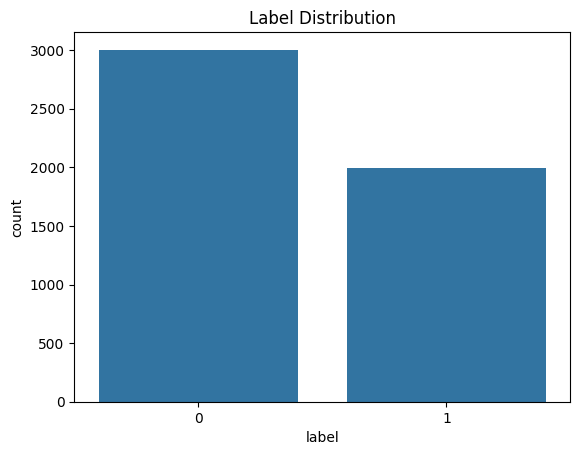

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()


### 3. Word Clouds

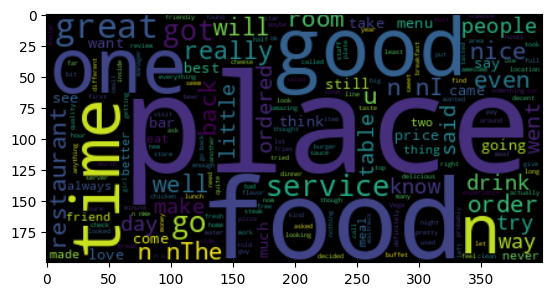

In [ ]:
#visualize raw text
wordcloud = WordCloud().generate(' '.join(df['text']))
plt.imshow(wordcloud, interpolation='bilinear')

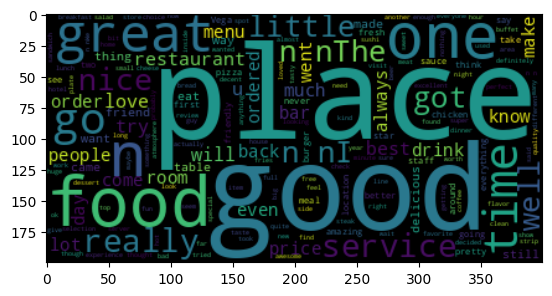

In [ ]:
#label 0
df0 = df[df['label']== 0]
df0


wordcloud = WordCloud().generate(' '.join(df0['text']))
plt.imshow(wordcloud, interpolation='bilinear')

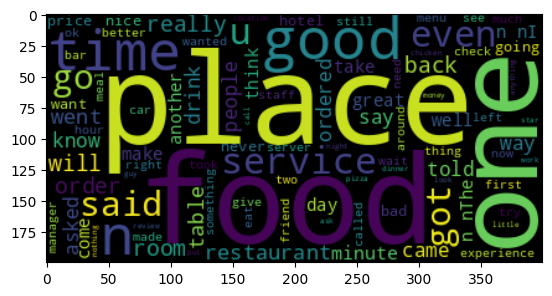

In [ ]:
#label 1
df1 = df[df['label']== 1]
df1


wordcloud = WordCloud().generate(' '.join(df1['text']))
plt.imshow(wordcloud, interpolation='bilinear')


### Insights:

- Missing data: there is no missing data as of now.
- Raw text viz: It gives a mixed insights of the food reviews.
                For example:
                 -label 0 : Negative reviews
                 -label 1: Psotive reviews
                  However both the viz shows mostly positive reviews.


### Text Pre-processing

We will do the following:
- Convert text to lowercase
- Remove special characters
- Remove stopwords
- Tokenize the text
- Apply stemming or lemmatization (optional)

In [ ]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Custom function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

# Apply the function to clean reviews
df['clean_text'] = df['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

In [ ]:
#df = df.drop(columns ='text', axis = 1).set_index('clean_text').reset_index()
#df_test = df_test.drop(columns ='text', axis = 1).set_index('clean_text').reset_index()

In [ ]:
df.iloc[4997,0]

"I have been here 2 times, the food is good, corse. I like that they have so many sauces, and toppings we can get our selves. I'm only giving this place 2 stars cause one dude raised his voice to me recently. Which upset me. I thought it was uncalled for. I didn't raise my voice to him. I have been here 2 times. One time a girl was the cashier she was nice, and very attractive. The 2nd time I came here cause I saw online they have game burgers, exotic meats, so I signed up online to get updates with my e-mail and they sent me a coupon for a burger, fries & a drink for 7$. Usually I'm guessing depending on the burger you get it would be 12$ for that. I went the 2nd time with the coupon and asked if I could use it towards the bison burger. He said yes, and I was going to pay the difference. Which came out to me 11$ or something. But I got confused, and was like I don't get why it's so much, and was asking him about that. For some reason my brain thought it was 7$ for a burger, and the ma

### Insights
- Lowercasing: Converts the text to lowercase for uniformity
- Removing special characters: Removes punctuation, numbers, and any characters that are non-alphabetic chr
- Tokenization: Splits the text into tokens
- Stopword removal: Removes common words that don’t contribute much meaning. eg: 'a','the','is' etc
- Lemmatization: Reduces words to their root form. eg: 'running' becomes 'run'


Example:


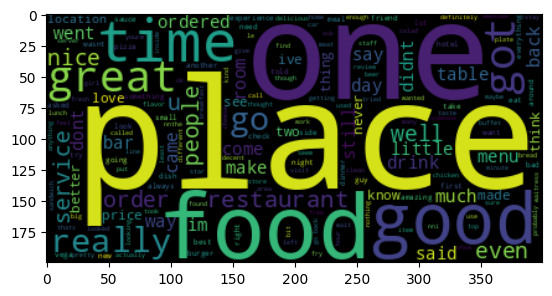

In [ ]:
#visluaize clean data on word clouds
#visualize raw text
wordcloud = WordCloud().generate(' '.join(df['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')

### 4. Review Length Distribution

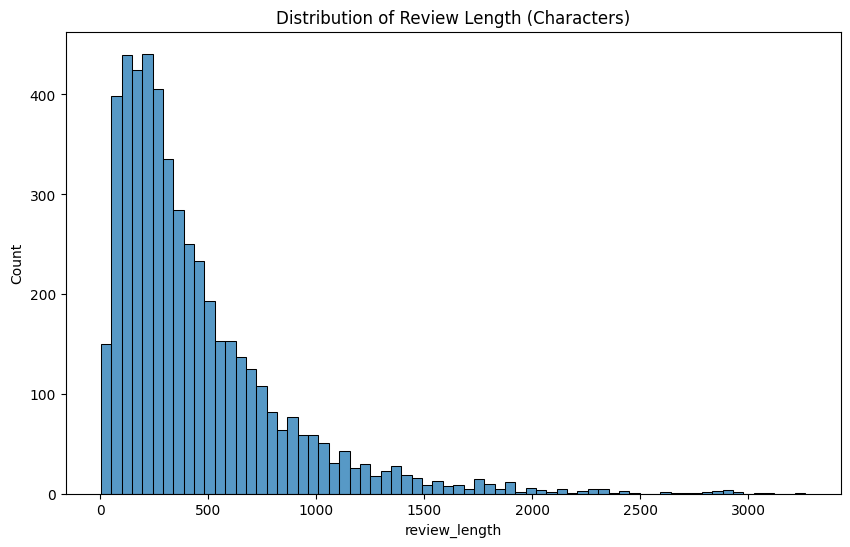

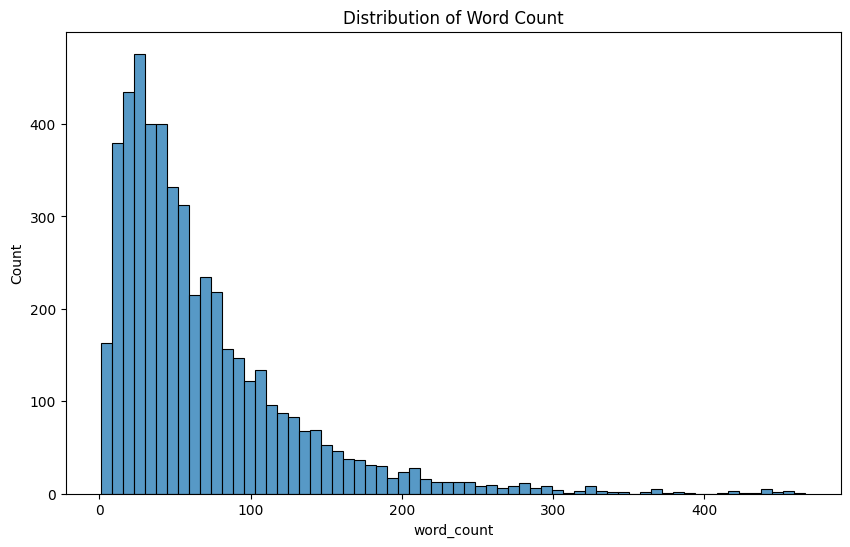

       review_length   word_count
count    5000.000000  5000.000000
mean      449.691200    68.597600
std       408.783607    61.783683
min         4.000000     1.000000
25%       176.000000    27.000000
50%       324.000000    50.000000
75%       592.000000    90.000000
max      3265.000000   467.000000


In [ ]:
#review_length
plt.figure(figsize=(10,6))
df['review_length'] = df['clean_text'].apply(len)
sns.histplot(df['review_length'])
plt.title('Distribution of Review Length (Characters)')
plt.show()
#word-count
plt.figure(figsize=(10,6))
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'])
plt.title('Distribution of Word Count')
plt.show()



# Summary statistics
print(df[['review_length', 'word_count']].describe())

### 5. Text Length vs. Label
Compare the average text length for each label to check if longer/shorter reviews are associated with positive or negative labels.

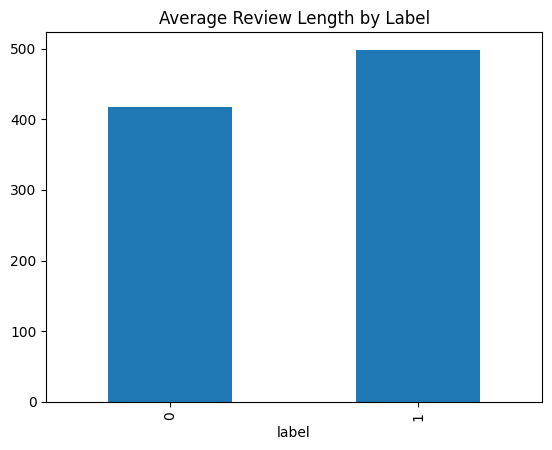

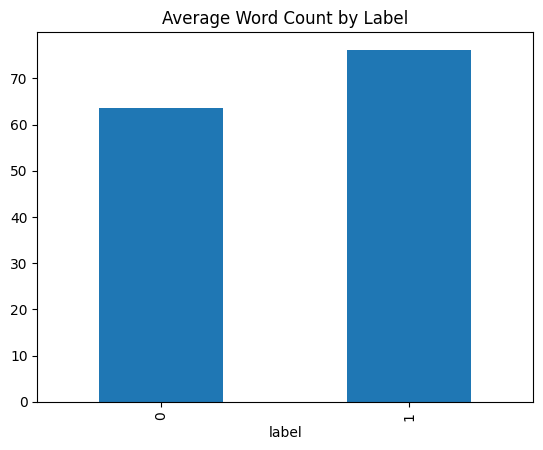

In [ ]:
# Compare text length across labels
df.groupby('label')['review_length'].mean().plot(kind='bar')
plt.title('Average Review Length by Label')
plt.show()

# Compare word count across labels
df.groupby('label')['word_count'].mean().plot(kind='bar')
plt.title('Average Word Count by Label')
plt.show()

### 6. Most Frequent Words
We can explore the most common words in the dataset. First, we'll clean the text (e.g., lowercasing, removing punctuation and stopwords), and then find frequent words

In [ ]:
corpus = df.clean_text

In [ ]:
corpus[100]

'know definitely shitn rainbow jenipho normal southwest pho spot accept cash debit hit rainbow step restaurant surprise look hellofalot smaller look outside somewhat hallway two row booth table problem walk one greet party stand around minute wondering supposed seat wait seated finally waitress step kitchen take order already seated customer try make eye contact wave rush back inside kitchen another minute passed time ready walk waitress rush back kitchen make eye contact without smile hello welcome point u table mind across hallway walk table find reset prior customer gentleman bust kitchen door clear table waitress approach u throw u menu without eye contact smile hello even welcome rainbow pho wheres decency end ordering eggrolls appetizer traditional steak pho curry noodle soup thai iced coffee minute pas food yet served mean long take stew beef broth raw meat let alone fry four eggrolls waiter come two large coke wherein inform part order apologizes say giving u free coke realizes

place         3205
food          2905
good          2901
time          2442
like          2429
service       1885
great         1837
really        1610
dont          1283
got           1259
didnt         1132
nice          1068
restaurant    1043
room          1001
order          991
im             982
come           961
went           958
people         938
ordered        937
dtype: int64


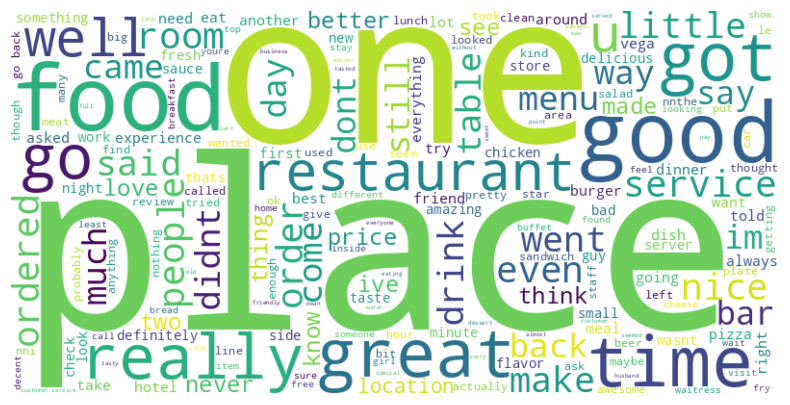

In [ ]:

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(corpus)

# Convert to a dataframe
word_counts = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up the counts for each word
word_freq = word_counts.sum().sort_values(ascending=False)

# Display the top 20 most frequent words
print(word_freq.head(20))

# Generate a word cloud for the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 6.1 Most Frequent Words by Label<br>

##### Homework: **(2 point each)**
Compare the most frequent words in each label category (0 and 1) to see if there are any notable differences in word usage.

- Create a label distribution of the clean_text
- Create a word cloud for cleaned positive reviews
- Create a words cloud for cleaned negative positve reviews

How to submit:
Please add your answers to the cell below.
Then upload this file back to moodle under inclass-assignment by renaming it with your cougarnet-id.
For ex: courganet_id.ipynb


**Homework Questions:**

Compare the most frequent words in each label category (0 and 1) to see if there are any notable differences in word usage.

In [52]:
df_pos = df[df['label']== 1]
df_pos

,text,label,text_length,word_count,clean_text,review_length,sentiment
0,TOURIST TRAP. I found this restaurant online a...,1,978,89,tourist trap found restaurant online hotel roo...,633,0.9527
3,"This club is pretty small, and rather interest...",1,94,10,club pretty small rather interesting nnbe sure...,65,0.8020
5,There are only 2 pros to this hotel - location...,1,2911,262,pro hotel location shopping saidnnwhere begin ...,1809,0.3565
6,My wife and I have stayed here many times duri...,1,1744,162,wife stayed many time year weve lived southern...,1097,0.9244
8,We are locals but we came here with friends . ...,1,726,68,local came friend service awful waitress rude ...,418,-0.8799
...,...,...,...,...,...,...,...
4993,This dealership has the worst sales reps (Mark...,1,1119,92,dealership worst sale rep mark richard justin ...,653,-0.9522
4994,My wife and I visited from Los Angeles and hap...,1,934,93,wife visited los angeles happened pas visiting...,579,0.9628
4995,I am an Interior Designer and was excited to a...,1,722,70,interior designer excited attend kbis big kitc...,459,-0.5267
4997,"I have been here 2 times, the food is good, co...",1,2682,248,time food good corse like many sauce topping g...,1559,0.2328


In [53]:
df_neg = df[df['label']== 0]
df_neg

,text,label,text_length,word_count,clean_text,review_length,sentiment
1,Not doing it for me. At least just me for the ...,0,4260,372,least great review see happy say buy hype ever...,2318,0.9976
2,Un Apple store comme tous les autres avec une ...,0,369,65,un apple store comme tous le autres avec une f...,334,-0.1280
4,wow ...Have not been here in a long time . Was...,0,410,33,wow long time nervous returning couple bad exp...,236,0.8862
7,Went for dinner last night because I bought a ...,0,1440,138,went dinner last night bought living social co...,880,0.9926
11,"Clean, friendly and a lot of space! Definitely...",0,206,22,clean friendly lot space definitely new dog pa...,146,0.9702
...,...,...,...,...,...,...,...
4989,Here it is short & sweet.......GARLIC CHICKEN ...,0,395,33,short sweetgarlic chicken xtra gravy best port...,210,0.8860
4990,I usually order a platter which comes with a p...,0,643,53,usually order platter come portion meat side h...,362,0.1027
4992,I thought the best place to go to stock up on ...,0,502,42,thought best place go stock essential new addi...,316,0.7997
4996,The car wash itself is good priced and clean. ...,0,1161,105,car wash good priced clean issue customer appe...,686,0.4768


In [54]:
# Initialize CountVectorizer for positive and negative reviews
vectorizer = CountVectorizer(stop_words='english')

# Positive reviews word frequencies
word_matrix_pos = vectorizer.fit_transform(df_pos[df['label'] == 1]['clean_text'])
word_counts_pos = pd.DataFrame(word_matrix_pos.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_pos = word_counts_pos.sum().sort_values(ascending=False)
print(word_freq_pos.head(30))


<ipython-input-54-180822cb6821>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  word_matrix_pos = vectorizer.fit_transform(df_pos[df['label'] == 1]['clean_text'])


food          1287
place         1237
time          1170
like          1073
service        982
good           969
dont           647
didnt          637
got            620
really         607
said           565
minute         552
order          526
room           525
went           506
came           495
restaurant     489
ordered        464
table          449
told           434
people         432
day            430
say            430
come           425
customer       419
asked          419
make           405
im             404
drink          403
know           402
dtype: int64


In [55]:
# Negative reviews word frequencies
word_matrix_neg = vectorizer.fit_transform(df_neg[df['label'] == 0]['clean_text'])
word_counts_neg = pd.DataFrame(word_matrix_neg.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_neg = word_counts_neg.sum().sort_values(ascending=False)
print(word_freq_neg.head(30))

<ipython-input-55-faaa6b255e45>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  word_matrix_neg = vectorizer.fit_transform(df_neg[df['label'] == 0]['clean_text'])


place         1968
good          1932
food          1618
great         1460
like          1356
time          1272
really        1003
service        903
nice           732
got            639
dont           636
little         623
pretty         594
love           594
im             578
best           573
restaurant     554
come           536
try            528
price          520
ive            516
drink          507
make           507
people         506
didnt          495
bar            490
thing          487
menu           482
room           476
ordered        473
dtype: int64


Create a label distribution of the clean_text

In [56]:
df_new = df[['label', 'clean_text']].copy()
df_new

,label,clean_text
0,1,tourist trap found restaurant online hotel roo...
1,0,least great review see happy say buy hype ever...
2,0,un apple store comme tous le autres avec une f...
3,1,club pretty small rather interesting nnbe sure...
4,0,wow long time nervous returning couple bad exp...
...,...,...
4995,1,interior designer excited attend kbis big kitc...
4996,0,car wash good priced clean issue customer appe...
4997,1,time food good corse like many sauce topping g...
4998,1,first night great immediately apparently mean ...


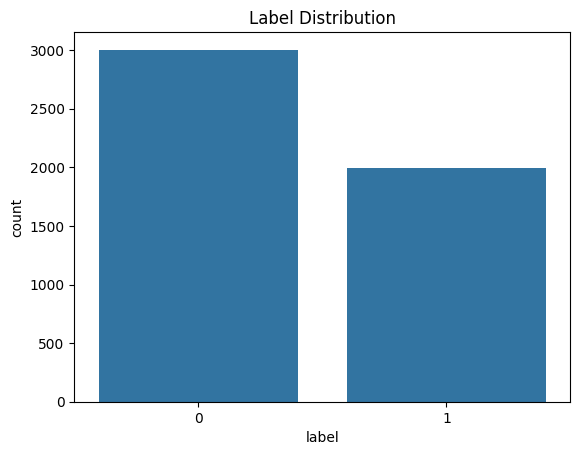

In [57]:
#Plot the distribution of labels 0 - negative and 1 - positive
sns.countplot(x='label', data=df_new)
plt.title("Label Distribution")
plt.show()

Create a word cloud for cleaned positive reviews

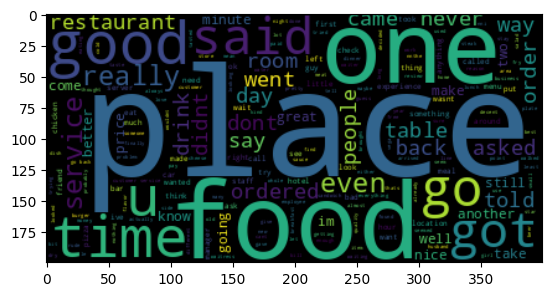

In [58]:
wordcloud = WordCloud().generate(' '.join(df_pos['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')

Create a words cloud for cleaned negative reviews



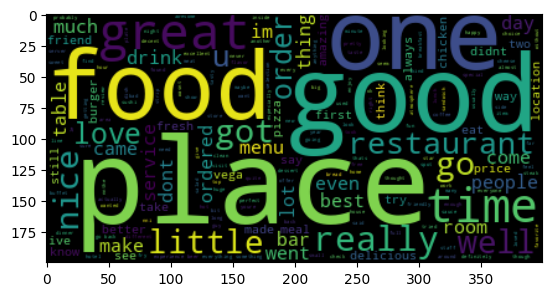

In [59]:
wordcloud = WordCloud().generate(' '.join(df_neg['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')

### 7. Sentiment Analysis

<Axes: xlabel='sentiment', ylabel='Count'>

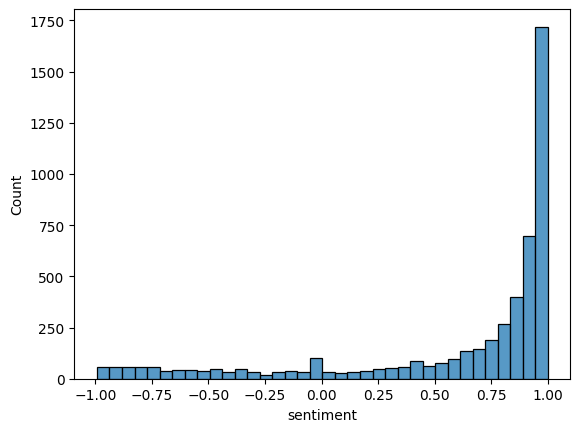

In [60]:
analyzer = SentimentIntensityAnalyzer()

df['sentiment'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
sns.histplot(df['sentiment'])


#### Homework Ex:

(total: 2 points each)

- Please groupby based on the labels
  - create the sentiment analysis chart based on the labels

### Insights:

sentiment on x-axis -> polarilty scores


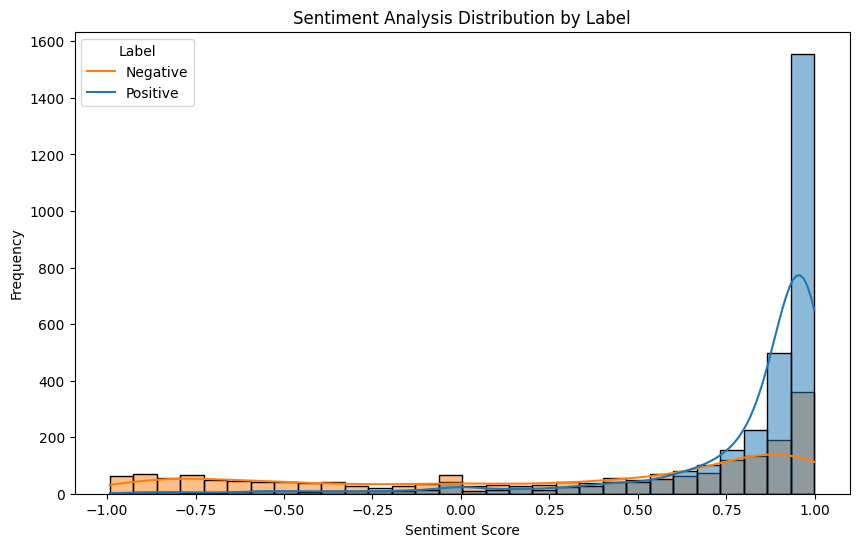

In [61]:
df['sentiment'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# create the sentiment analysis chart based on the labels
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment', hue='label', kde=True, bins=30)
plt.title('Sentiment Analysis Distribution by Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Negative', 'Positive'])
plt.show()

### 8. N-grams Analysis
Explore frequent two-word and three-word combinations (bigrams and trigrams), which can provide additional context or meaning.
![image.png](attachment:1e574ef1-c8fa-4a64-a553-e732c718451d.png)

*image courtsey: KDnuggets*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizer for bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(df['clean_text'])
bigram_counts = pd.DataFrame(bigram_matrix.toarray(), columns=bigram_vectorizer.get_feature_names_out())

# Sum and display top 10 most frequent bigrams
bigram_freq = bigram_counts.sum().sort_values(ascending=False)
print(bigram_freq.head(10))

# Trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigram_matrix = trigram_vectorizer.fit_transform(df['clean_text'])
trigram_counts = pd.DataFrame(trigram_matrix.toarray(), columns=trigram_vectorizer.get_feature_names_out())

# Sum and display top 10 most frequent trigrams
trigram_freq = trigram_counts.sum().sort_values(ascending=False)
print(trigram_freq.head(10))

### 9. Correlation Heatmap between Length and Label <br>
Check if there is a correlation between text length (character or word count) and the label.

In [ ]:
# Correlation between text length and label
correlation = df[['review_length', 'word_count', 'label']].corr()
print(correlation)

# Heatmap for visualization
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Text Length and Label')
plt.show()

### 10. Topic Modeling (LDA)
Latent Dirichlet allocation is a topic modeling technique for uncovering the central topics and their distributions across a set of documents.(IBM)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
from gensim.models.ldamodel import LdaModel


# Step 1: Prepare the text data for Gensim (converting to bag-of-words format)
texts = [text.split() for text in df['clean_text']]  # Tokenize the cleaned text

# Create a dictionary representation of the documents
id2word = corpora.Dictionary(texts)

# Create the corpus: Term Document Frequency (how often each term appears in each document)
corpus = [id2word.doc2bow(text) for text in texts]

# Step 2: Fit the LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=42, passes=10)

# Step 3: Visualize the topics with pyLDAvis
lda_vis = gensimvis.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(lda_vis)


In [ ]:
# Print the top words for each topic
topics = lda_model.print_topics(num_words=10)  # Change num_words to adjust the number of words per topic

# Loop through each topic and print it
for topic_num, topic in topics:
    print(f"Topic {topic_num}: {topic}")

### Insights:

- Intertopic Distance Map: Shows how distinct or similar the topics are.
- Top Terms for Each Topic: Displays the most important terms contributing to each topic. You can adjust the relevance metric to explore different words' importance in the topics.


- Topic 1 and Topic 2 are large and overlapping a little, suggesting they are the most prominent and possibly share some terms.
- Topic 3, 4, and 5 are smaller, indicating they are less prevalent in the data, with Topic 3 being the least common topic.